In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [44]:
class Mapa(object):
    
    def __init__(self,nx,ny,Ttop,Tbottom,Tleft,Tright,Tini):
        self.x = nx
        self.y = ny
        self.Tt = Ttop
        self.Tb = Tbottom
        self.Tl = Tleft
        self.Tr = Tright
        self.Ti = Tini
        
    
    #Para llenar mi matriz de ceros inicialmente
        self.T = np.zeros((nx,ny))
#El fill rellena la matriz con un valor, en este caso será la temperatura inicial llamada (Tini)
        self.T.fill(Tini)
#print(T)
# Condiciones de frontera
        self.T[0, :] = Ttop
        self.T[-1, :] = Tbottom
        self.T[:, -1] = Tright
        self.T[:, 0] = Tleft
        
    def iteration(self,x):
        for i in range(x):
            tmp = np.zeros(self.T.shape)
#En este caso es de gran utilidad el np.roll ya que en mis valores de frontera tienen el altercado que no poder
#realizarse diferencias finitas, porque en sus extremos me faltaria un valor para completar dicha operación, 
#El np.roll lo soluciona, ese comando desplaza elementos de la matriz como uno lo desee
# Diferencias finitas T[i, j] = T[i,j]+(T[i,j-1]+T[i-1,j]-4*T[i,j]+T[i+1,j]+T[i,j+1])
            tmp=self.T+0.25*(np.roll(self.T,1,axis=0)+np.roll(self.T,-1,axis=0)+np.roll(self.T,1,axis=1)+np.roll(self.T,-1,axis=1)-4*self.T)
            return tmp
    

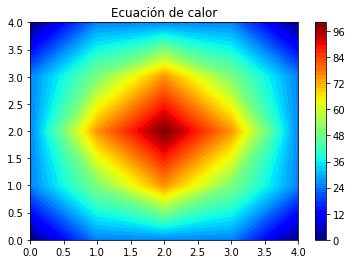

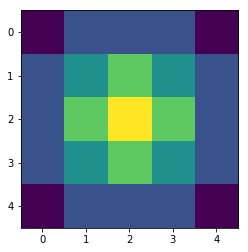

In [46]:
A=Mapa(5,5,0,0,0,0,100)
R=A.iteration(3)
colorinterpolation=50
colourMap=plt.cm.jet
plt.title('Ecuación de calor')
plt.contourf(R, colorinterpolation, cmap=colourMap)
plt.colorbar()
    #print(T)
plt.figure()
plt.imshow(R)

In [133]:
def iteration1(T):
    tmp = np.zeros(T.shape)

# Diferencias finitas
    for i in range(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            #T[i, j] = T[i,j]+(T[i,j-1]+T[i-1,j]-4*T[i,j]+T[i+1,j]+T[i,j+1])
            tmp[i,j] = T[i,j]+0.25*(T[i,j-1]+T[i-1,j]-4*T[i,j]+T[i+1,j]+T[i,j+1])
    return tmp

273.9	236.1	232.7	183.9	241.2	248.7	252.8	184.9	200.6	216.0	232.3	209.1	173.9	156.8	199.6	230.1	203.3	172.5	151.1	197.5	243.0	248.5	177.0	196.2	210.3	[[273.890625 236.125    232.65625  183.875    241.234375]
 [248.703125 252.8125   184.875    200.5625   216.046875]
 [232.296875 209.0625   173.9375   156.8125   199.640625]
 [230.140625 203.3125   172.5      151.0625   197.484375]
 [242.953125 248.5      176.96875  196.25     210.296875]]
200.3	185.7	212.7	166.9	188.6	172.8	196.8	163.1	178.1	161.1	156.3	152.7	152.1	133.9	144.5	156.2	152.6	152.0	133.8	144.5	172.7	196.7	162.9	178.0	161.0	[[200.34375  185.65625  212.703125 166.90625  188.625   ]
 [172.8125   196.8125   163.09375  178.0625   161.09375 ]
 [156.265625 152.6875   152.0625   133.9375   144.546875]
 [156.21875  152.5625   152.03125  133.8125   144.5     ]
 [172.6875   196.71875  162.921875 177.96875  160.96875 ]]
137.4	128.2	156.5	115.5	129.4	122.3	146.5	124.8	133.7	114.4	110.9	116.0	117.2	103.2	102.9	106.9	105.3	114.5	92.59	98.9

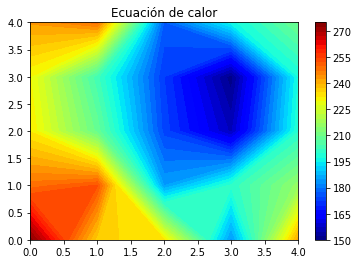

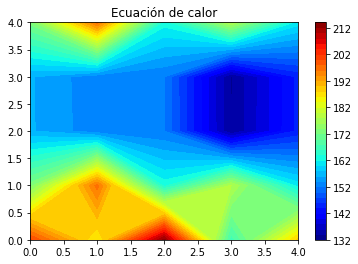

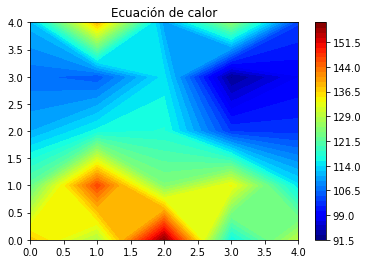

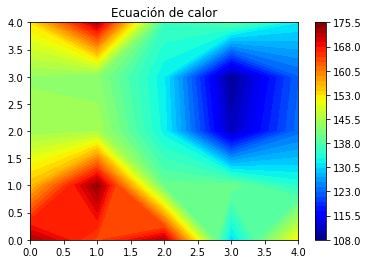

<Figure size 432x288 with 0 Axes>

In [171]:
#OBJETIVO: Generar tablas con matrices y respectivos gráficos,en el cada tabla o txt este representada por unas 
#condiciones aleatorias aleatorias pero se va a mostrar en todos los tipos de txt la iteración que se desee


#Esta primera función imprime dicha tabla, en donde se quiere ajustar de tal modo que el número flotante
#Sólo imprima dos dígítos al lado derecho después del punto y 4 dígitos en total
#Por último, esta función imprimir tabla se generó debido a que la matriz no generaba una buena visualización 
def imprimir_tabla(tabla):
    for i in range(tabla.shape[0]):
        #print()
        for j in range(tabla.shape[1]):
            print(f'{tabla[i][j]:2.4}', end="\t")
    return tabla

    
#Este comando me genera números aleatorios, según las fuentes es establecer una semilla
rand.seed()
#El for i in range que aparece a continuación es la cantidad de tablas que se va a generar, en este caso serán 4 tablas
#Cada uno con unas condiciones de frontera diferentes, lo que no va a cambiar es:
#La dimensión de la matriz y la condición inicial
for i in range(4):
    Te = condiciones(5,5, rand.randrange(100,500),rand.randrange(10,100),rand.randrange(100,500),rand.randrange(10,100), 100)
    #print(Te)
#Es claro que aquí no es necesario llamar la función iteration, ya que a partir de la función guarT esta la llama
#Además esta función es útil porque solo se quiere imprimir una iteración específica.
    Tem= guardaT(3,Te)
    Tabla=imprimir_tabla(Tem)
    print(Tabla)
    colorinterpolation=50
    colourMap=plt.cm.jet
    plt.title('Ecuación de calor')
    plt.contourf(Tem, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    plt.figure()
    plt.imshow(Tem)
    #plt.clf()
    #x=input()
    
#COMO GUARDAR LA MATRIZ EN UN TXT? Y LA IMAGEN!!!!!!?????????
    #np.savetxt('tabla.txt',Tabla,delimiter='\t',fmt=)
    #plt.savefig('tabla')
    #print(Tem)


In [157]:
#Colocarlo en un numpy
from sys import argv

if __name__ == '__main__':
	n_filas = argv[1]
    n_cols = argv[2]
    n_ini=argv[3]
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
#conceptos que se uso
#para que hizo y porque
#tiempo
#como estruturo la solucion
#ejemplo donde coloque en practica
#y otros ejemplos de los resultados
#numero de estabilidad
